path=WindowsPath('c:/Users/Burai/OneDrive/Documents/GitHub/Brian-Gomez-Santiestevez-OPA23GB/ML_pt2_Labb2')


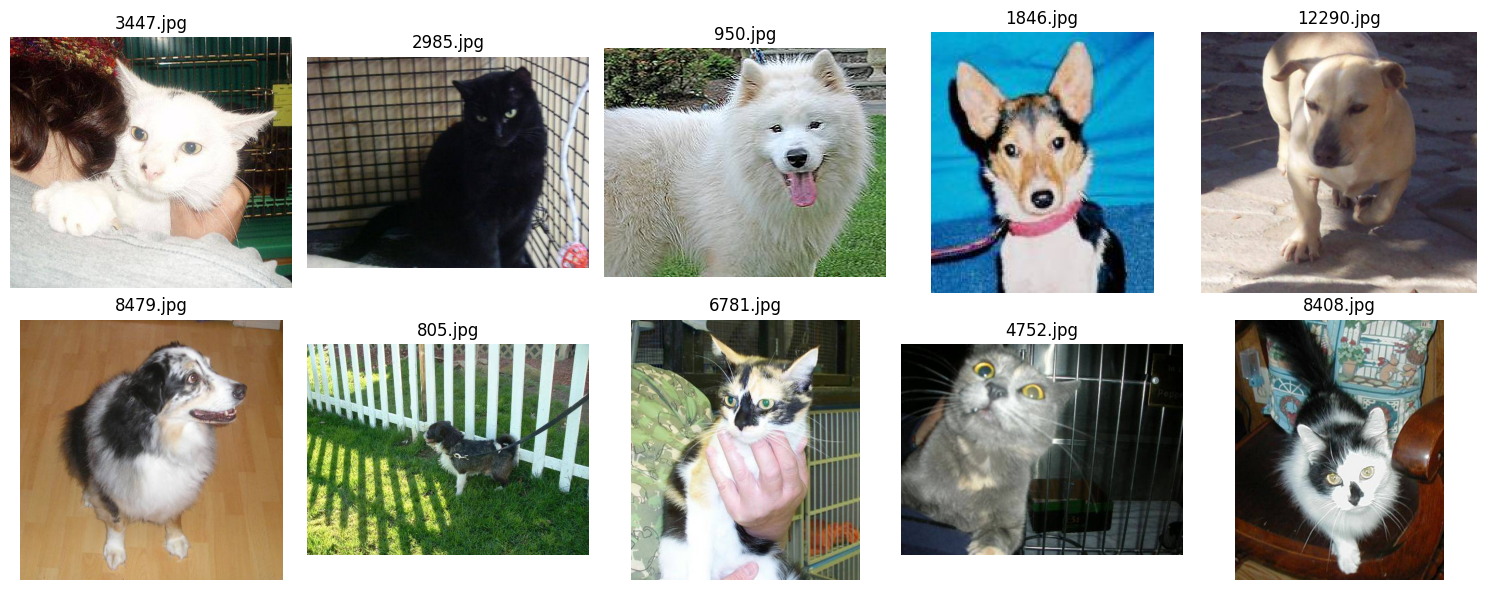

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import random

# Set the path to the directory containing the image files
path = Path().absolute()
print(f"{path=}")

# Correctly set up the absolute path as a Path object
absolute_path = Path(r"c:/Users/Burai/OneDrive/Documents/GitHub/Brian-Gomez-Santiestevez-OPA23GB/ML_pt2_Labb2/original_data/test/test")

# List all .jpg image files in the directory
image_files = list(absolute_path.glob('*.jpg'))

# Check if there are enough files to sample from
if len(image_files) < 10:
    raise ValueError("Not enough image files to sample 10 items.")

# randomly select 10 image files
random_files = random.sample(image_files, 10)

# figure to display the images in a grid
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # Adjust subplot grid as needed
axes = axes.flatten()

# Read and display each image file
for ax, file_path in zip(axes, random_files):
    # Read the image using OpenCV
    image = cv2.imread(str(file_path), cv2.IMREAD_UNCHANGED)
    # Convert BGR to RGB (OpenCV loads images in BGR)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Display the image
    ax.imshow(image_rgb)
    ax.axis('off')  # Hide axes
    ax.set_title(file_path.name)  #set the file name as title

plt.tight_layout()
plt.show()


In [8]:
# import shutil
# from pathlib import Path
# import random

# def create_directory_structure(base_dir):
#     # Define the base directory as a Path object
#     base_path = Path(base_dir)
    
#     # List of directories to create
#     directories = [
#         'experiment_small_data/test',
#         'experiment_small_data/train',
#         'experiment_small_data/val',
#         'experiment_tiny_data/test',
#         'experiment_tiny_data/train',
#         'experiment_tiny_data/val'
#     ]
    
#     # Loop through the directories list and create each one
#     for directory in directories:
#         (base_path / directory).mkdir(parents=True, exist_ok=True)
    
#     print("Directory structure created successfully!")

# def distribute_files(base_dir, source_dir, experiments):
#     patterns = {
#         'dogs': 'dog.*.jpg',
#         'cats': 'cat.*.jpg'
#     }
    
#     # Initialize dictionaries to store images
#     images = { 'dogs': [], 'cats': [] }

#     # Populate dictionaries by filtering with patterns and ensuring 1250 files each
#     for file in source_dir.glob('*.jpg'):
#         if 'dog' in file.name and len(images['dogs']) < 1250:
#             images['dogs'].append(file)
#         elif 'cat' in file.name and len(images['cats']) < 1250:
#             images['cats'].append(file)
    
#     # Check if we have enough images
#     if len(images['dogs']) < 1250 or len(images['cats']) < 1250:
#         print(f"Not enough images: Found {len(images['dogs'])} dogs and {len(images['cats'])} cats.")
#         return
    
#     # Handle the distribution for each experiment
#     for experiment, splits in experiments.items():
#         for category, img_list in images.items():
#             random.shuffle(img_list)

#             # Calculate the number of files for each subset based on the specifications
#             num_train = splits['train']
#             num_val = splits['val']
#             num_test = splits['test']

#             # Split images into train, val, and test
#             train_images = img_list[:num_train]
#             val_images = img_list[num_train:num_train + num_val]
#             test_images = img_list[num_train + num_val:num_train + num_val + num_test]

#             # Move files to their new destinations
#             for img_list, split in zip([train_images, val_images, test_images], ['train', 'val', 'test']):
#                 target_path = base_dir / experiment / split
#                 target_path.mkdir(parents=True, exist_ok=True)  # Ensure target directory exists
#                 for image in img_list:
#                     try:
#                         shutil.move(str(image), target_path / image.name)  # Use move instead of copy to avoid duplicates
#                     except FileNotFoundError:
#                         print(f"File not found, skipping: {image}")

# # Define the base directory and the source directory
# base_dir = Path(r'C:/Users/Burai/OneDrive/Documents/GitHub/Brian-Gomez-Santiestevez-OPA23GB/ML_pt2_Labb2')
# source_dir = base_dir / 'original_data/train/train'  # Updated path to the combined directory

# # Create the necessary directory structure
# create_directory_structure(base_dir)

# # Define the experiments and the number of images per category for each split
# experiments = {
#     'experiment_small_data': {'train': 800, 'val': 200, 'test': 250},  # Each number is per category
#     'experiment_tiny_data': {'train': 80, 'val': 20, 'test': 25}       # Each number is per category
# }

# # Distribute files according to the defined splits
# distribute_files(base_dir, source_dir, experiments)

# print("Files have been distributed according to the defined splits.")





# # DONT RUN AGAIN. FILES HAVE BEEN MOVED ALREADY.

Split data into experiment_small_data folder

In [27]:
from pathlib import Path
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def load_dataset(data_dir, target_size=(150, 150)):
    data = []
    labels = []
    data_dir = Path(data_dir)
    
    # Debug: print the directory being read
    print(f"Reading images from {data_dir}")
    
    for img_path in data_dir.glob("*.jpg"):
        img = load_img(img_path, target_size=target_size)
        img_array = img_to_array(img)
        data.append(img_array)
        if 'dog' in img_path.name:
            labels.append("dog")
        elif 'cat' in img_path.name:
            labels.append("cat")
    
    # Debug: print the number of images read
    print(f"Found {len(data)} images in {data_dir}")
    
    return np.array(data), np.array(labels)

# Assuming datapath is correctly set to "experiment_small_data/train"
datapath = Path().absolute() / "experiment_small_data/train"
images, labels = load_dataset(datapath)

# Debug: print the number of images loaded
print(f"Loaded {len(images)} images from {datapath}")

# Ensure there are at least 2 images before accessing their shapes
if len(images) > 1:
    print(images[0].shape, images[1].shape)
else:
    print("Not enough images to display shapes.")

# Debug: Print out some image paths to verify
paths = [str(path) for path in datapath.glob("*.jpg")]
print("Image paths:")
print("\n".join(paths[:10]))  # Print first 10 image paths for verification

"dog" in paths[0]  # Check if the first image path contains "dog"

Reading images from c:\Users\Burai\OneDrive\Documents\GitHub\Brian-Gomez-Santiestevez-OPA23GB\ML_pt2_Labb2\experiment_small_data\train
Found 1600 images in c:\Users\Burai\OneDrive\Documents\GitHub\Brian-Gomez-Santiestevez-OPA23GB\ML_pt2_Labb2\experiment_small_data\train
Loaded 1600 images from c:\Users\Burai\OneDrive\Documents\GitHub\Brian-Gomez-Santiestevez-OPA23GB\ML_pt2_Labb2\experiment_small_data\train
(150, 150, 3) (150, 150, 3)
Image paths:
c:\Users\Burai\OneDrive\Documents\GitHub\Brian-Gomez-Santiestevez-OPA23GB\ML_pt2_Labb2\experiment_small_data\train\cat.3249.jpg
c:\Users\Burai\OneDrive\Documents\GitHub\Brian-Gomez-Santiestevez-OPA23GB\ML_pt2_Labb2\experiment_small_data\train\cat.3251.jpg
c:\Users\Burai\OneDrive\Documents\GitHub\Brian-Gomez-Santiestevez-OPA23GB\ML_pt2_Labb2\experiment_small_data\train\cat.3252.jpg
c:\Users\Burai\OneDrive\Documents\GitHub\Brian-Gomez-Santiestevez-OPA23GB\ML_pt2_Labb2\experiment_small_data\train\cat.3254.jpg
c:\Users\Burai\OneDrive\Documents\Git

False

In [26]:
import numpy as np 
y = np.array([int("dog" in path) for path in paths])
y



False

In [29]:
import os
import numpy as np
from pathlib import Path
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import random

# Define the data path
datapath = Path().absolute() / "experiment_small_data/train"

# Get a list of all .jpg files
file_paths = list(datapath.glob("*.jpg"))

# Shuffle the list of file paths
random.shuffle(file_paths)

# Use list comprehension to read in the images as numpy arrays
images = [img_to_array(load_img(file_path, target_size=(150, 150))) for file_path in file_paths]
images = np.array(images)

# Extract labels from the shuffled list (1 for dog, 0 for cat)
labels = np.array([1 if 'dog' in file_path.name else 0 for file_path in file_paths])

# Output the results
print(f"Number of images loaded: {len(images)}")
print(f"Shape of images array: {images.shape}")
print(f"Shape of labels array: {labels.shape}")
print("First 10 labels:", labels[:100]) # Print the first 10 labels for verification. THEYRE RANDOM NOW


Number of images loaded: 1600
Shape of images array: (1600, 150, 150, 3)
Shape of labels array: (1600,)
First 10 labels: [0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0
 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0
 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1]


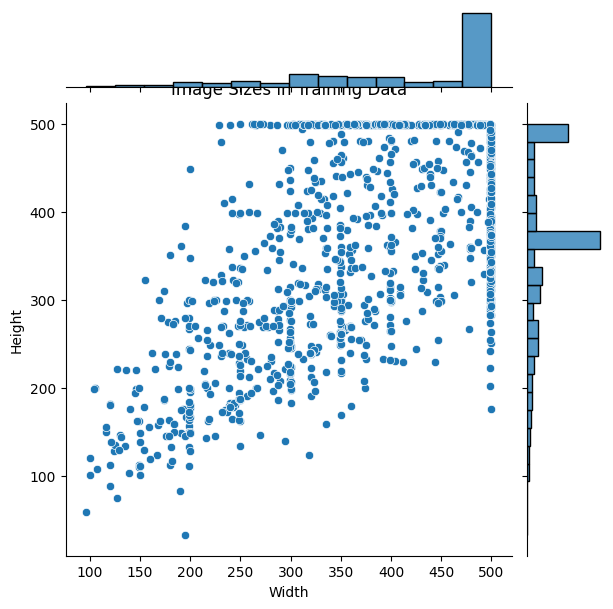

In [34]:
import numpy as np
from pathlib import Path
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random


def get_image_sizes(data_dir):
    sizes = []
    for img_path in Path(data_dir).glob("*.jpg"):
        with Image.open(img_path) as img:
            sizes.append(img.size)  # (width, height)
    return sizes

# Path to the training data
train_path = Path().absolute() / "experiment_small_data/train"
image_sizes = get_image_sizes(train_path)

# Convert sizes to numpy array for plotting
sizes = np.array(image_sizes)



# Plotting image sizes
sns.jointplot(x=sizes[:, 0], y=sizes[:, 1], kind='scatter')
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Image Sizes in Training Data')
plt.show()


Data augmentation is a technique used to artificially increase the size of a training dataset by creating modified versions of images in the dataset. This helps in improving the model's ability to generalize and avoid overfitting by introducing more variety in the training data. Choosing the right parameters for data augmentation depends on the nature of the images and the specific task. Common augmentations include rotations, shifts, flips, zooms, and changes in brightness. 

In [ ]:
############################################################################################################
############################################################################################################
############################          Obsolete code            #############################################
############################################################################################################
############################################################################################################


# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
# import numpy as np
# from pathlib import Path
# import matplotlib.pyplot as plt
# import seaborn as sns
# from PIL import Image

# # Define the paths
# train_path = Path().absolute() / "experiment_small_data/train"
# val_path = Path().absolute() / "experiment_small_data/val"
# test_path = Path().absolute() / "experiment_small_data/test"

# # Function to resize images
# def resize_images(data_dir, target_size=(150, 150)):
#     data = []
#     labels = []
#     for img_path in Path(data_dir).glob("*.jpg"):
#         img = load_img(img_path, target_size=target_size)
#         img_array = img_to_array(img)
#         data.append(img_array)
#         if 'dog' in img_path.name:
#             labels.append(1)
#         elif 'cat' in img_path.name:
#             labels.append(0)
#     return np.array(data), np.array(labels)

# # Resize images
# train_images, train_labels = resize_images(train_path, target_size=(150, 150))
# val_images, val_labels = resize_images(val_path, target_size=(150, 150))
# test_images, test_labels = resize_images(test_path, target_size=(150, 150))

# # Function to visualize images
# def visualize_images(images, labels, class_names, num_images=9):
#     plt.figure(figsize=(10, 10))
#     for i in range(num_images):
#         plt.subplot(3, 3, i + 1)
#         plt.imshow(images[i].astype("uint8"))
#         plt.title(class_names[labels[i]])
#         plt.axis("off")
#     plt.show()

# # Visualize a few images
# class_names = ["cat", "dog"]
# visualize_images(train_images, train_labels, class_names)

# # Data augmentation
# datagen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# # Fit the generator to the training data
# datagen.fit(train_images)

# # Visualize some augmented images
# def visualize_augmented_images(datagen, images, num_images=9):
#     plt.figure(figsize=(10, 10))
#     for X_batch, _ in datagen.flow(images, np.zeros(len(images)), batch_size=num_images):
#         for i in range(0, num_images):
#             plt.subplot(3, 3, i + 1)
#             plt.imshow(X_batch[i].astype("uint8"))
#             plt.axis('off')
#         break
#     plt.show()

# visualize_augmented_images(datagen, train_images)

# # Define the CNN model with Sigmoid activation
# def create_model(input_shape=(150, 150, 3), num_classes=2):
#     model = Sequential([
#         Input(shape=input_shape),
#         Conv2D(32, (3, 3), activation='sigmoid'),
#         MaxPooling2D((2, 2)),
#         Conv2D(64, (3, 3), activation='sigmoid'),
#         MaxPooling2D((2, 2)),
#         Conv2D(128, (3, 3), activation='sigmoid'),
#         MaxPooling2D((2, 2)),
#         Flatten(),
#         Dense(128, activation='sigmoid'),
#         Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
#     ])
#     return model

# # Compile the model
# model = create_model()
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels), batch_size=32)

# # Visualize and analyze loss and accuracy curves
# def plot_history(history):
#     # Plot training & validation accuracy values
#     plt.figure(figsize=(12, 4))
#     plt.subplot(1, 2, 1)
#     plt.plot(history.history['accuracy'])
#     plt.plot(history.history['val_accuracy'])
#     plt.title('Model accuracy')
#     plt.ylabel('Accuracy')
#     plt.xlabel('Epoch')
#     plt.legend(['Train', 'Validation'], loc='upper left')

#     # Plot training & validation loss values
#     plt.subplot(1, 2, 2)
#     plt.plot(history.history['loss'])
#     plt.plot(history.history['val_loss'])
#     plt.title('Model loss')
#     plt.ylabel('Loss')
#     plt.xlabel('Epoch')
#     plt.legend(['Train', 'Validation'], loc='upper left')
    
#     plt.show()

# # Plot the history of the trained model
# plot_history(history)

# # Evaluate the model on test data
# test_loss, test_accuracy = model.evaluate(test_images, test_labels)
# print(f'Test accuracy: {test_accuracy * 100:.2f}%')

In [12]:
#adding this because i was not sure the model was working correctly. it keeps giving me 50% accuracy.
# Ensure test data is correctly loaded and preprocessed
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

# Check the distribution of labels
unique, counts = np.unique(test_labels, return_counts=True)
print(f"Test label distribution: {dict(zip(unique, counts))}")


# Check the range and mean of pixel values
print(f"Train images range: {train_images.min()} to {train_images.max()}")
print(f"Test images range: {test_images.min()} to {test_images.max()}")

# Re-evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy * 100:.2f}%')




Test images shape: (500, 150, 150, 3)
Test labels shape: (500,)
Test label distribution: {0: 250, 1: 250}
Train images range: 0.0 to 255.0
Test images range: 0.0 to 255.0
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8039 - loss: 0.6809
Test loss: 0.6933583617210388
Test accuracy: 50.00%


Train images shape: (1600, 150, 150, 3), Train labels shape: (1600,)
Val images shape: (400, 150, 150, 3), Val labels shape: (400,)
Test images shape: (500, 150, 150, 3), Test labels shape: (500,)
Train label distribution: {0: 800, 1: 800}
Val label distribution: {0: 200, 1: 200}
Test label distribution: {0: 250, 1: 250}
Train images range: 0.0 to 255.0
Test images range: 0.0 to 255.0


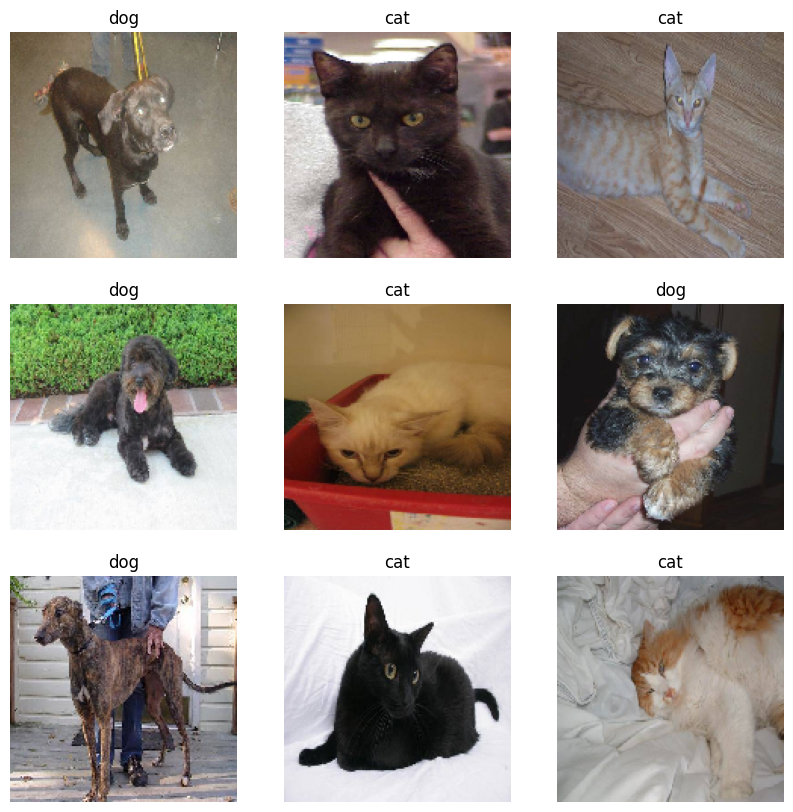

Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 23s 416ms/step - accuracy: 0.5437 - loss: 13.3800 - val_accuracy: 0.4950 - val_loss: 12.7646 - learning_rate: 1.0000e-04
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 401ms/step - accuracy: 0.5455 - loss: 12.9006 - val_accuracy: 0.5450 - val_loss: 12.1443 - learning_rate: 1.0000e-04
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 400ms/step - accuracy: 0.5808 - loss: 12.3833 - val_accuracy: 0.6050 - val_loss: 11.7373 - learning_rate: 1.0000e-04
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 404ms/step - accuracy: 0.6043 - loss: 11.9857 - val_accuracy: 0.6250 - val_loss: 11.4582 - learning_rate: 1.0000e-04
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 400ms/step - accuracy: 0.5823 - loss: 11.6247 - val_accuracy: 0.6325 - val_loss: 11.1489 - learning_rate: 1.0000e-04
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 398ms/step - accuracy: 0.6220 - loss: 11.3536 - val_accuracy: 0.6100 - val_loss: 10.9846 - learning_rate: 1.0000e-04
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 397m

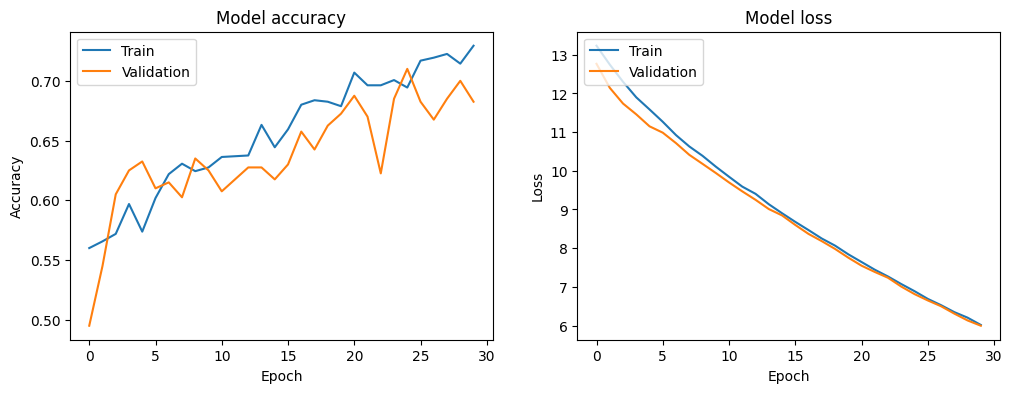

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.7319 - loss: 5.9292
Test loss: 5.962789535522461
Test accuracy: 70.40%


In [23]:
#ökar antalet epoker till 20 och ser om det förbättrar modellen. Tar även hjälp av chatGPT för att snabbare ordna med debugging och se om distributionen av labels är korrekt, samt att se om pixelvärdena är korrekta.

import numpy as np
from pathlib import Path
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator # Added ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization #adding batch normalization for better results, hopefully
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Define paths
train_path = Path().absolute() / "experiment_small_data/train"
val_path = Path().absolute() / "experiment_small_data/val"
test_path = Path().absolute() / "experiment_small_data/test"

# Function to resize images
def resize_images(data_dir, target_size=(150, 150)):
    data = []
    labels = []
    for img_path in Path(data_dir).glob("*.jpg"):
        img = load_img(img_path, target_size=target_size)
        img_array = img_to_array(img)
        data.append(img_array)
        if 'dog' in img_path.name:
            labels.append(1)
        elif 'cat' in img_path.name:
            labels.append(0)
    return np.array(data), np.array(labels)

# Load and resize images
train_images, train_labels = resize_images(train_path, target_size=(150, 150))
val_images, val_labels = resize_images(val_path, target_size=(150, 150))
test_images, test_labels = resize_images(test_path, target_size=(150, 150))


# added a shuffle to the test dataset to ensure randomness
test_indices = np.arange(test_images.shape[0])
np.random.shuffle(test_indices)
test_images = test_images[test_indices]
test_labels = test_labels[test_indices]

# Debugging: Print shapes and check data balance
print(f"Train images shape: {train_images.shape}, Train labels shape: {train_labels.shape}")
print(f"Val images shape: {val_images.shape}, Val labels shape: {val_labels.shape}")
print(f"Test images shape: {test_images.shape}, Test labels shape: {test_labels.shape}")

# Check the distribution of labels
unique_train, counts_train = np.unique(train_labels, return_counts=True)
unique_val, counts_val = np.unique(val_labels, return_counts=True)
unique_test, counts_test = np.unique(test_labels, return_counts=True)

print(f"Train label distribution: {dict(zip(unique_train, counts_train))}")
print(f"Val label distribution: {dict(zip(unique_val, counts_val))}")
print(f"Test label distribution: {dict(zip(unique_test, counts_test))}")

# Check the range of pixel values
print(f"Train images range: {train_images.min()} to {train_images.max()}")
print(f"Test images range: {test_images.min()} to {test_images.max()}")





# Function to visualize images
def visualize_images(images, labels, class_names, num_images=9):
    plt.figure(figsize=(10, 10))
    indices = np.random.choice(range(len(images)), num_images, replace=False)
    for i, idx in enumerate(indices):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[idx].astype("uint8"))
        plt.title(class_names[labels[idx]])
        plt.axis("off")
    plt.show()

# Visualize a few images
class_names = ["cat", "dog"]
visualize_images(train_images, train_labels, class_names)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the generator to the training data
datagen.fit(train_images)

# Visualize some augmented images
def visualize_augmented_images(datagen, images, num_images=9):
    plt.figure(figsize=(10, 10))
    for X_batch, _ in datagen.flow(images, np.zeros(len(images)), batch_size=num_images):
        for i in range(0, num_images):
            plt.subplot(3, 3, i + 1)
            plt.imshow(X_batch[i].astype("uint8"))
            plt.axis('off')
        break
    plt.show()


def create_model(input_shape=(150, 150, 3), num_classes=2):
    model = Sequential([
        Input(shape=input_shape),
        Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

# Compile the model
model = create_model()
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy']) # Lower learning rate for better convergence. Prev. 0.01

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) # Stop early if val_loss does not improve. Restore best weights. Values based on experimentation.
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001) # Reduce learning rate if val_loss does not improve. values based on experimentation. Prev LR = 0.01

# Train the model
history = model.fit(datagen.flow(train_images, train_labels, batch_size=32), 
                    epochs=30, 
                    validation_data=(val_images, val_labels), 
                    callbacks=[early_stopping, reduce_lr])

# Plot training & validation accuracy values
def plot_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Plot the history of the trained model
plot_history(history)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy * 100:.2f}%')


Jag märkte av att ChatGPT använde ReLU på alla hidden layers och Sigmoid på output layer. Detta gav ett bättre resultat än när jag använde sigmoid på alla lager.
Efter att ha läst på lite fick jag reda på att ReLU introducerar modellen till icke-linjäritete och låter nätverket lära sig komplexa mönster.
ReLU är dessutom snabbare på att kalkylera. ReLU sätter negativa värden till noll, vilket kan leda till glesa aktiveringar i nätverket. Glesa modeller kan vara mer effektiva och ibland bättre på att generalisera.
Hidden layers behöver lära sig komplexa mönster och relationer i datan. ReLU hjälper med detta genom att tillhandahålla icke-linjärhet och undvika problem som försvinnande gradient.

För binär klassificering bör det sista layer ge en sannolikhet som indikerar sannolikheten att insatsen tillhör en viss klass. Sigmoid är idealisk för detta eftersom den ger utgångar mellan 0 och 1.
Sigmoid-funktionens utgång kan enkelt tolkas som en sannolikhet, vilket gör det enkelt att mappa nätverkets utgång till en av de två klasserna.

Adding Relu to hidden layers and making sure the dataset was properly shuffled seem to have given me better results.
from 50% accuracy to 58% and now 68% with 10 epochs.

After raising epochs to 30  the results showed a high level of overfitting and a test accuracy of 60%.
For the next try i will add an early stopper and reduced learning rate.






After looking for conventional techniques for refining CNN models i added BatchNormalization, EarlyStopper, reduced learning rate. 
i also fixed a mistake i had made by not adding the data augmentation function when moving on to this version of the code. 
i also added the visualization functions. for fun.

After a run WITHOUT data augmentation it gave a test accuracy of 70%. 
The training accuracy steadily increases and reaches around 0.70, which indicates that the model is learning from the training data.
The validation accuracy also improves, reaching a peak slightly above 0.70 but shows some fluctuations.
The training loss decreases steadily, which is a good sign that the model is learning effectively.
The validation loss also decreases steadily, which indicates that the model is not overfitting significantly and is generalizing better to the validation data compared to previous attempts.

On the last run WITH data augmentation it gave very similar results as the previous run at 70%. At the moment i dont really know what i should do to improve the model. 
I imagine playing around with more hyperparametertuning and changing around the layers would change the results. Maybe even raising or lowering the Epochs used. 
But i feel done with this Model at the moment.